# 7. 카메라 스티커앱 만들기 첫걸음

|평가문항|상세기준|
|---|---|
|1. 자기만의 카메라앱 기능 구현을 완수하였다.|얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는 데 성공하였다.|
|2. 스티커 이미지를 정확한 원본 위치에 반영하였다.|정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.|
|3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.|얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.|

In [1]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 
import math

print(cv2.__version__)
print(dlib.__version__)

4.7.0
19.24.1


In [2]:
filter_path=os.getcwd()+"/filter"
image_path=os.getcwd()+"/face"
print(filter_path)
print(image_path)

c:\Users\gibeom2\OneDrive\python\exploration\EP-07/filter
c:\Users\gibeom2\OneDrive\python\exploration\EP-07/face


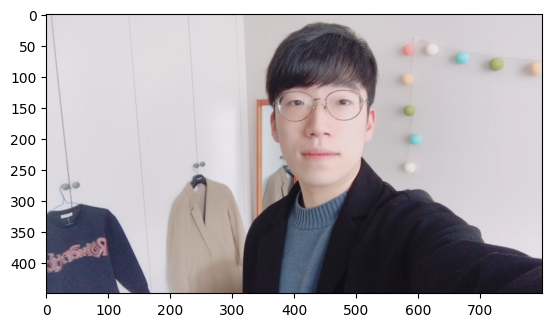

In [3]:
img_bgr = cv2.imread(image_path+"/image.png")    # OpenCV로 이미지를 불러옵니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_rgb.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_rgb) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

rectangles[[(345, 98) (531, 284)]]


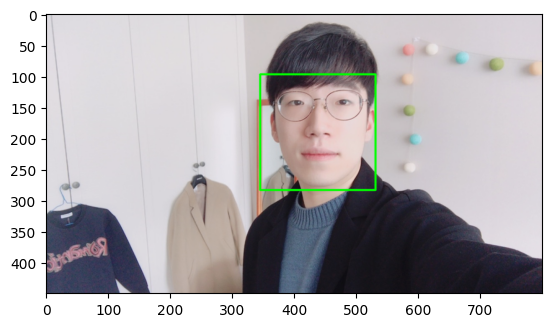

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

plt.imshow(img_show)
plt.show()

In [5]:
model_path = os.getcwd()+'/model/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))

68


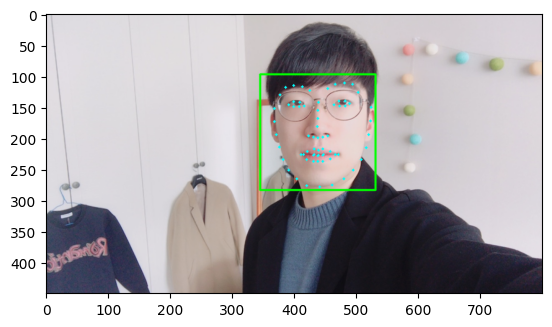

In [6]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

    # RGB 이미지로 전환
plt.imshow(img_show)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

이때, 각 점의 landmark와 point 인덱스를 식별해 놓아야 나중에 추가할 필터의 위치를 알기 쉬울거 같아 확인해본다

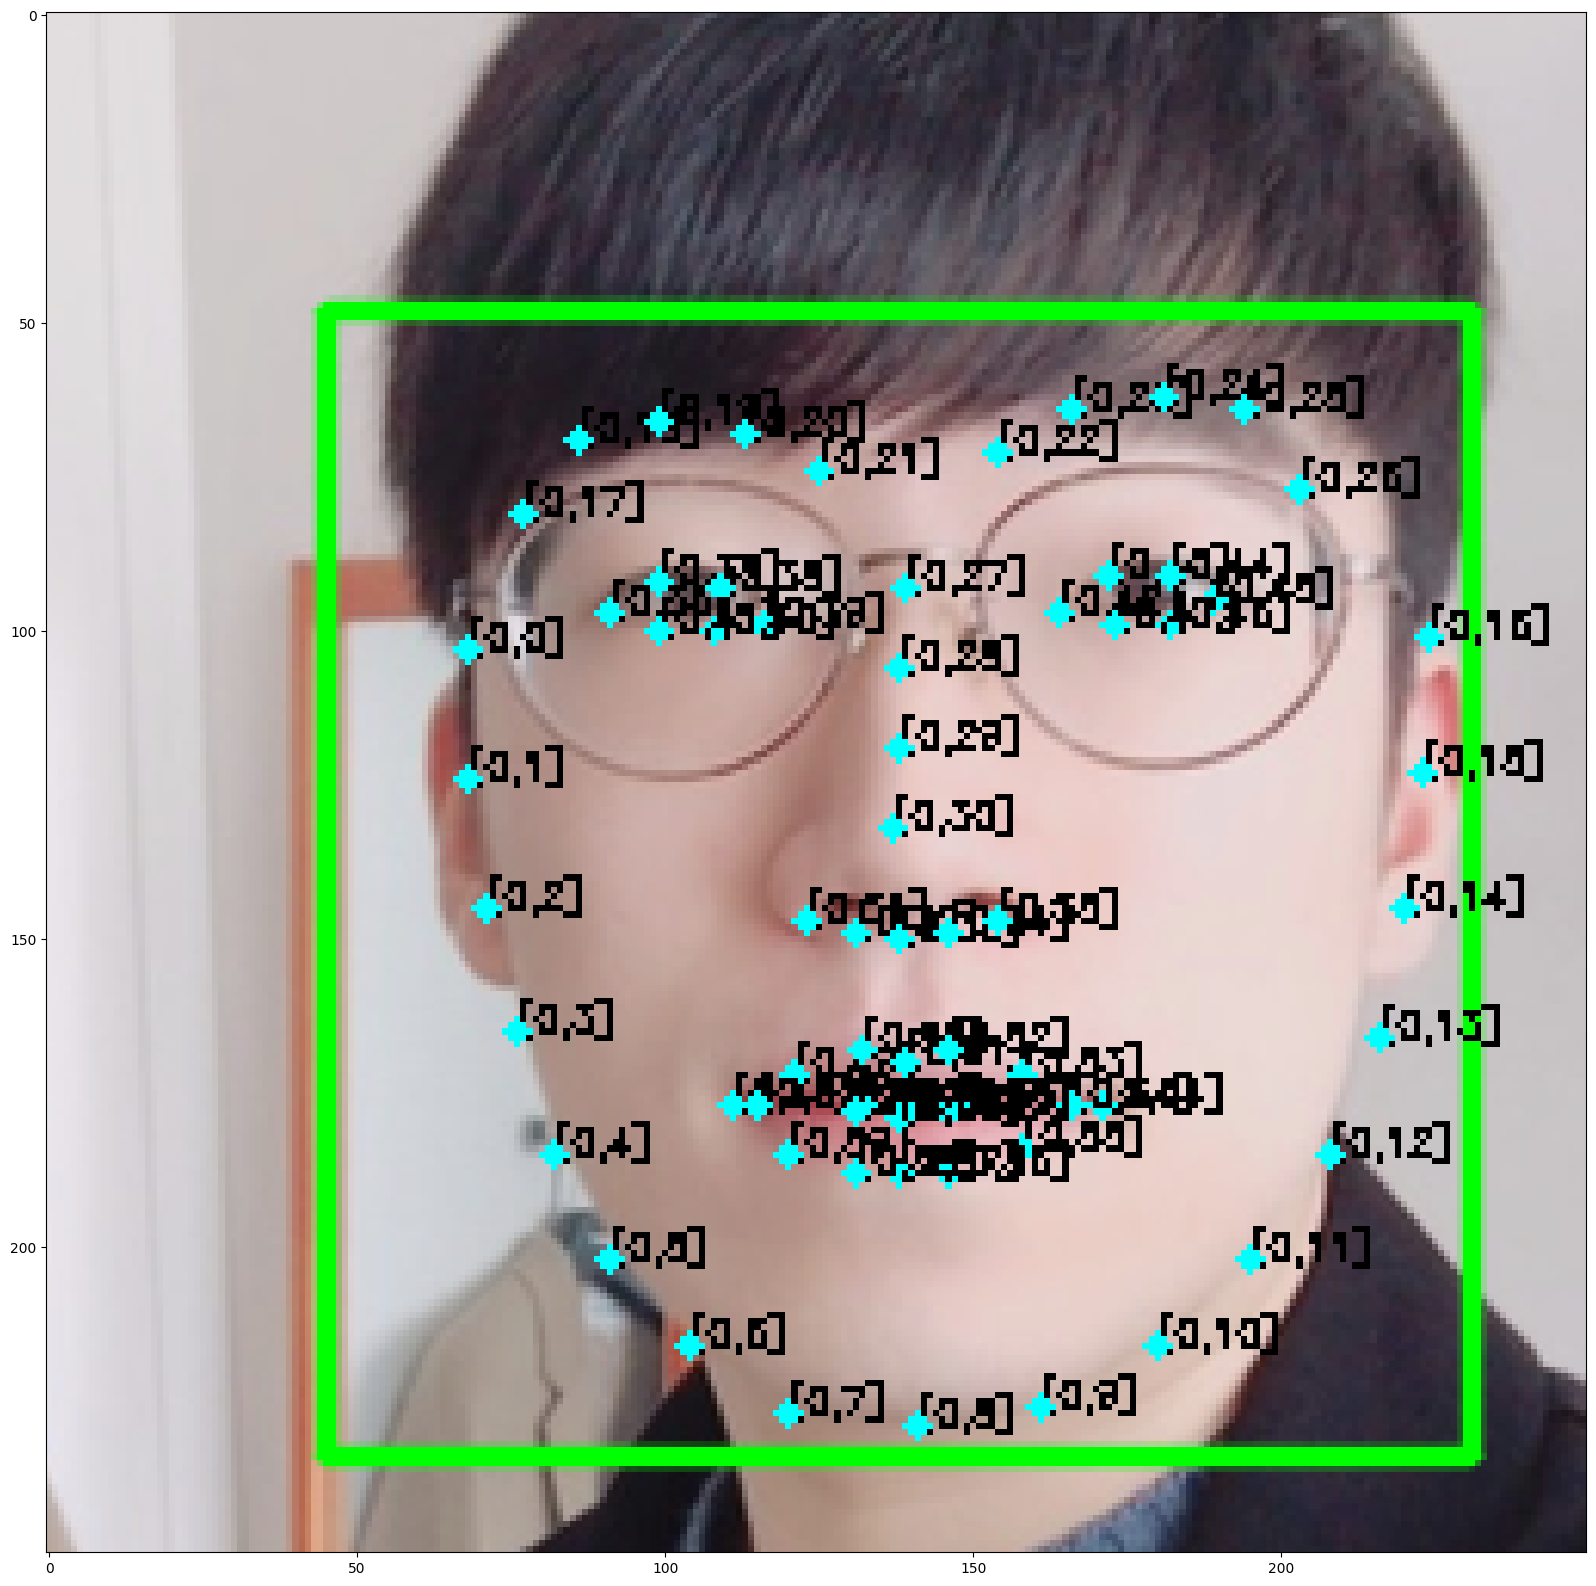

In [7]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
i=0
j=0
for landmark in list_landmarks:
    
    for point in landmark:
        cv2.putText(img_show, f"[{i},{j}]", point, cv2.FONT_HERSHEY_SIMPLEX, 0.2, (0,0,0))
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)
        j=j+1
    i=i+1
    # RGB 이미지로 전환
    
crop_img = img_show[50:300, 300:550]
plt.figure(figsize=(20,20))
plt.imshow(crop_img)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

확인결과 랜드마크는 0 하나뿐인걸 확인할 수 있었다.  
하지만 포인트의 경우 눈,코,입 주변의 포인트를 확인하기 어려웠기에 이를 확인하기 위해 subplot을 사용하도록 한다.

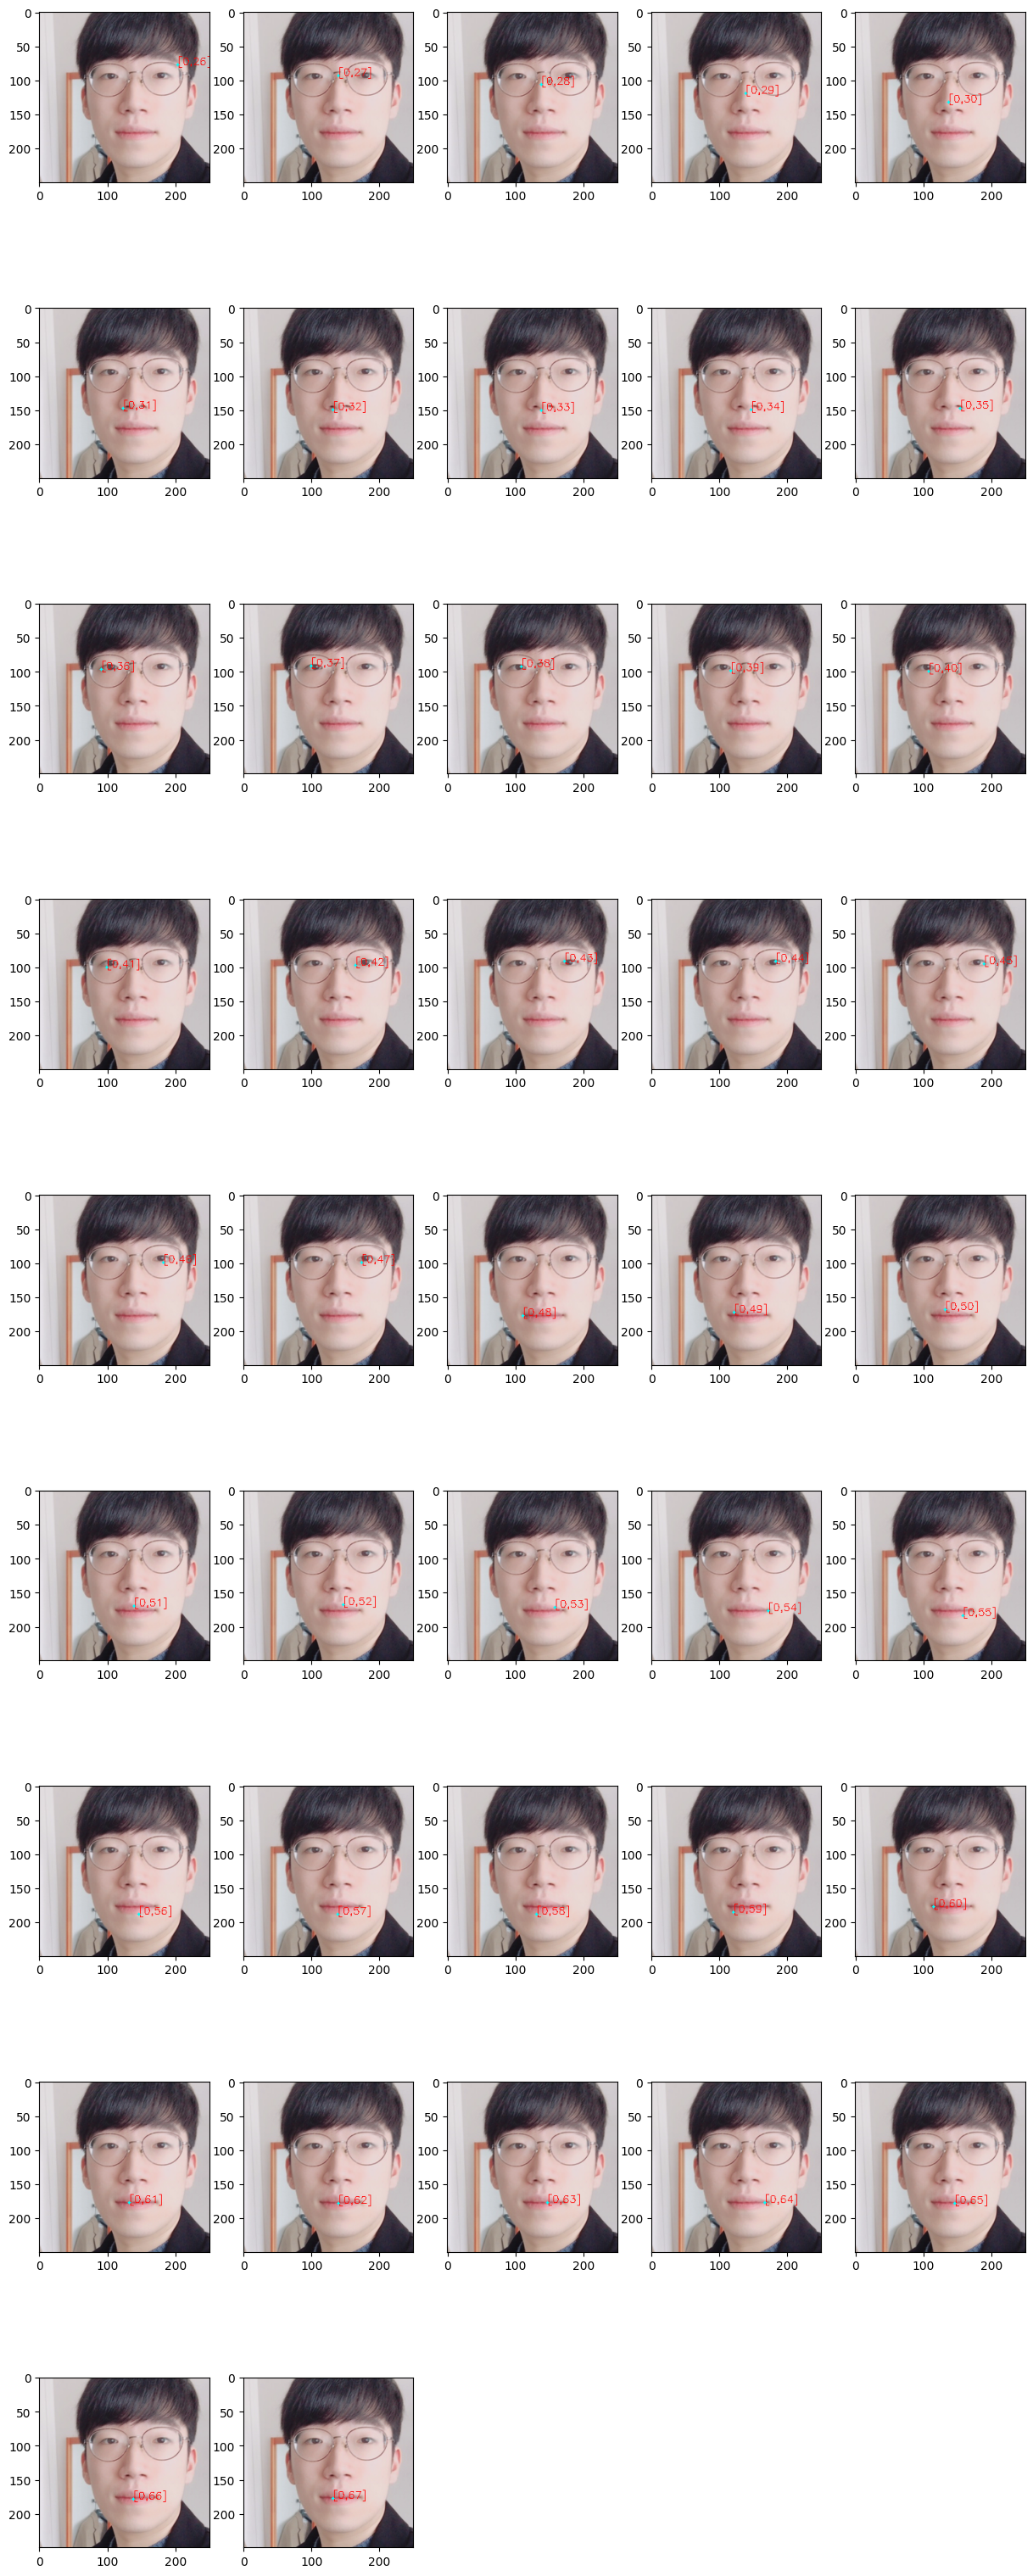

In [8]:
fig = plt.figure(figsize = (15,40))
i=0
j=0
for landmark in list_landmarks:
    for point in landmark:
        if j<26:
            j=j+1
            continue
        plt.subplot(9,5,i+1)
        i=i+1
        temp_image=img_rgb.copy()
        cv2.putText(temp_image, f"[0,{j}]", point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0))
        cv2.circle(temp_image, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)
        j=j+1
        crop_img = temp_image[50:300, 300:550]
        plt.imshow(crop_img)

확인결과 33이 코의 아랫부분의 점, 51이 입술의 윗부분의 점인걸 확인 할 수 있었다.  
따라서 고양이수염을 추가한다면 이 사이에 위치해야 한다는 걸 알 수 있다.

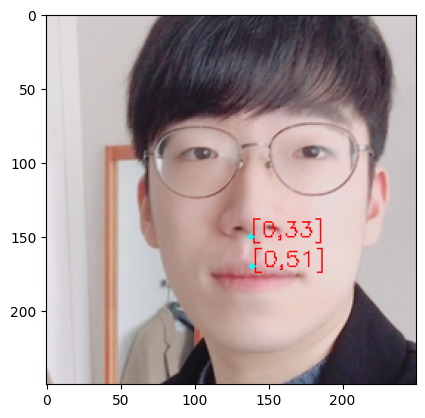

In [9]:
temp_image=img_rgb.copy()
cv2.putText(temp_image, "[0,33]", list_landmarks[0][33], cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0))
cv2.circle(temp_image, list_landmarks[0][33], 2, (0, 255, 255), -1)
cv2.putText(temp_image, "[0,51]", list_landmarks[0][51], cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0))
cv2.circle(temp_image, list_landmarks[0][51], 2, (0, 255, 255), -1)
    # cv2.circle: OpenCV의 원을 그리는 함수
    # img_show 이미지 위 각각의 point에
    # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
    # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)
j=j+1
crop_img = temp_image[50:300, 300:550]
plt.imshow(crop_img)

In [10]:
print(list_landmarks[0][33])
print(list_landmarks[0][51])

(438, 200)
(439, 220)


In [11]:
point=((list_landmarks[0][51][0]+list_landmarks[0][33][0])//2, (list_landmarks[0][51][1]+list_landmarks[0][33][1])//2)
point

(438, 210)

In [12]:
sticker_path = filter_path+'/cat-whiskers.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
print(img_sticker.shape)
img_sticker = cv2.resize(img_sticker, (dlib_rect.width(),int(img_sticker.shape[1]*dlib_rect.width()/img_sticker.shape[0]))) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(512, 512, 3)
(187, 187, 3)


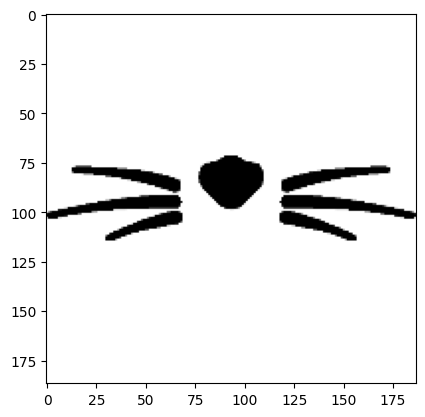

In [13]:
plt.imshow(img_sticker)
plt.show()

In [14]:
print(img_show.shape)

(450, 800, 3)


In [15]:
temp1=int(point[1]-img_sticker.shape[1]/2)
temp2=int(point[0]-img_sticker.shape[0]/2)
temp3=int(point[1]+img_sticker.shape[1]/2)
temp4=int(point[0]+img_sticker.shape[0]/2)

if temp1<0:
    temp1=0
if temp2<0:
    temp2=0
if temp3>img_show.shape[0]:
    temp3=img_show.shape[0]
if temp4>img_show.shape[1]:
    temp4=img_show.shape[1]
    
start_point=(temp1,temp2)
end_point=(temp3,temp4)
print(start_point,end_point)

(116, 344) (303, 531)


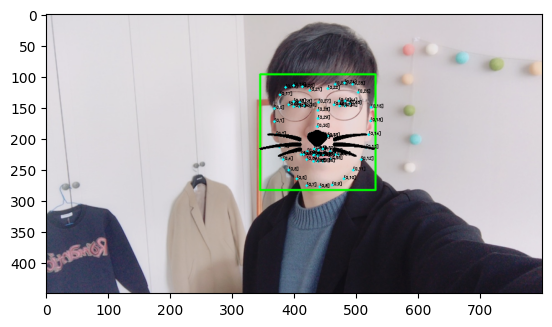

In [16]:
sticker_area = img_show[temp1:temp3, temp2:temp4]
img_show[temp1:temp3, temp2:temp4] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(img_show)
plt.show()

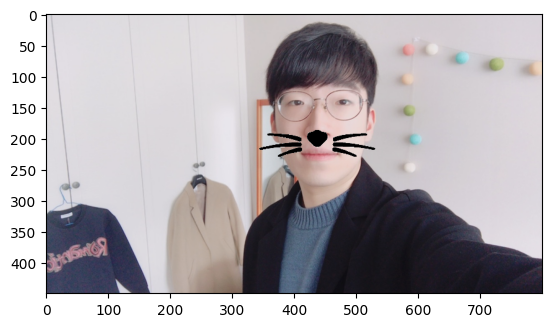

In [17]:
img_show=img_rgb.copy()
sticker_area = img_show[temp1:temp3, temp2:temp4]
img_show[temp1:temp3, temp2:temp4] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(img_show)
plt.show()

실행결과 위와 같이 잘 적용되는 것을 알 수 있다.  
다만 이건 얼굴각도를 반영하지 않으므로 얼굴 각도를 반영하도록 코드를 수정해본다.

In [18]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
  return result

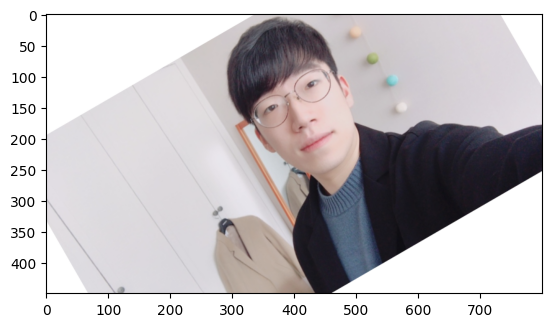

In [19]:
(h, w) = img_rgb.shape[:2]
(cX, cY) = (w // 2, h // 2)

rotated30_img = rotate_image(img_rgb,30)

plt.imshow(rotated30_img)
plt.show()

rectangles[[(339, 98) (494, 253)]]


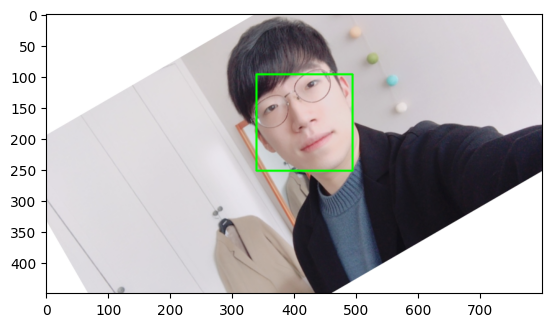

In [20]:
ro_dlib_rects = detector_hog(rotated30_img, 1)   # (image, num of image pyramid)

print(ro_dlib_rects)   

for dlib_rect in ro_dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(rotated30_img, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

plt.imshow(rotated30_img)
plt.show()

In [21]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in ro_dlib_rects:
    points = landmark_predictor(rotated30_img, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))

68


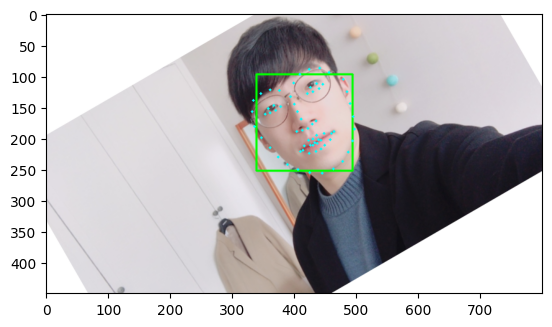

In [22]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(rotated30_img, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

    # RGB 이미지로 전환
plt.imshow(rotated30_img)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

얼굴의 각도를 알아내는데 콧날에 있는 점들이 가장 적합하다고 판단되어 해당 점들을 이용하기로 한다.  
콧날에 있는점 즁에서 27번과 30번 점을 이용하도록 한다.

In [23]:
def angle_between_points(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    dx, dy = x2 - x1, y2 - y1
    return math.degrees(math.atan2(dy, dx))

face_angle=90-angle_between_points(list_landmarks[0][27],list_landmarks[0][30])
face_angle

25.277722235552957

In [24]:
(cX, cY)

(400, 225)

(512, 512, 3)
(156, 156, 3)


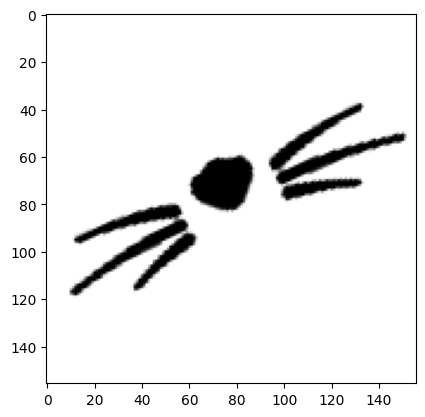

In [25]:
sticker_path = filter_path+'/cat-whiskers.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
print(img_sticker.shape)


img_sticker = cv2.resize(img_sticker, (dlib_rect.width(),int(img_sticker.shape[1]*dlib_rect.width()/img_sticker.shape[0]))) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)

rotated30_sticker=rotate_image(img_sticker,face_angle)

print (rotated30_sticker.shape) 
plt.imshow(rotated30_sticker)
plt.show()

In [26]:
point=((list_landmarks[0][51][0]+list_landmarks[0][33][0])//2, (list_landmarks[0][51][1]+list_landmarks[0][33][1])//2)
point

(426, 193)

In [27]:
temp1=int(point[1]-rotated30_sticker.shape[1]/2)
temp2=int(point[0]-rotated30_sticker.shape[0]/2)
temp3=int(point[1]+rotated30_sticker.shape[1]/2)
temp4=int(point[0]+rotated30_sticker.shape[0]/2)

if temp1<0:
    temp1=0
if temp2<0:
    temp2=0
if temp3>rotated30_img.shape[0]:
    temp3=rotated30_img.shape[0]
if temp4>rotated30_img.shape[1]:
    temp4=rotated30_img.shape[1]
    
start_point=(temp1,temp2)
end_point=(temp3,temp4)
print(start_point,end_point)

(115, 348) (271, 504)


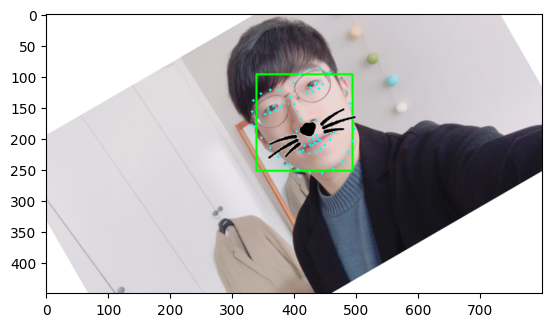

In [28]:
sticker_area = rotated30_img[temp1:temp3, temp2:temp4]
rotated30_img[temp1:temp3, temp2:temp4] = np.where(rotated30_sticker==255,sticker_area,rotated30_sticker).astype(np.uint8)

plt.imshow(rotated30_img)
plt.show()

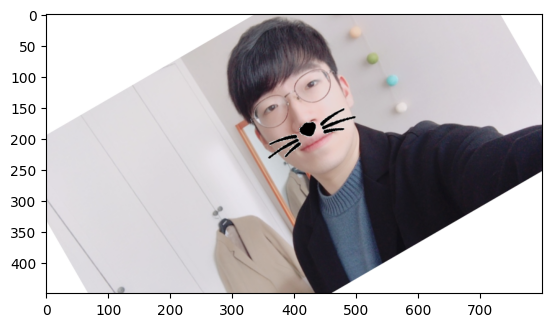

In [29]:
img_show=img_rgb.copy()
img_show=rotate_image(img_show,30)

sticker_area = img_show[temp1:temp3, temp2:temp4]
img_show[temp1:temp3, temp2:temp4] = np.where(rotated30_sticker==255,sticker_area,rotated30_sticker).astype(np.uint8)

plt.imshow(img_show)
plt.show()

위와 같이 얼굴에 각도가 생겼을 때에도 정상적으로 수염이 그려지는 것을 확인할 수 있다.  

다음으로 어두운 이미지에도 잘 반응하는가를 확인해보고자 한다.

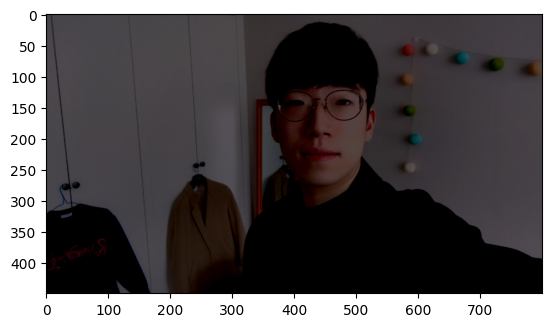

In [41]:
sub_img=np.clip(img_rgb.astype('int32') - 150, 0, 255).astype('uint8')

plt.imshow(sub_img)
plt.show()